# 高性能実験環境を準備する

高性能実験環境として、[mdx](https://www.u-tokyo.ac.jp/focus/ja/press/z0310_00027.html)環境を利用するための設定をします。  
以下のセルを上から順番に実行してください。  
2回目以降の実行の場合、このセルが選択された状態で画面上部に表示される以下のボタンをクリックしてから実行して下さい。  
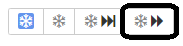

◆◆◆開発メモ◆◆◆  
将来的には、[学認クラウドオンデマンド構築サービス](https://cloud.gakunin.jp/ocs/)による動的な環境構築を実現する。

## 1. 高性能実験環境のアカウント情報の入力

以下のセルを実行し、表示されるフォームに高性能実験環境におけるアカウント情報を入力してください。

In [ ]:
from IPython.display import clear_output
import getpass
name_mdx = input("高性能実験環境におけるSSHユーザ名：")
clear_output()

## 2. アカウント認証のための設定

[こちら](../../../../tree) を押下し、ファイル一覧画面に遷移してください。  
遷移後、id_rsaファイルをドラッグアンドドロップによりアップロードしてください。  
アップロード後、以下のセルを実行してください。

In [ ]:
!mkdir -p /home/jovyan/.ssh/
!mv ~/id_rsa* ~/.ssh/id_rsa
!chmod 600 ~/.ssh/id_rsa

## 3. 高性能実験環境への接続設定の実施

以下のセルを実行し、高性能実験環境に接続するための設定を実施してください。

In [ ]:
path_flow_root = '/home/jovyan/WORKFLOW/FLOW/'
os.chdir(path_flow_root)
from util.scripts import utils
import json

# 以下の認証の手順で用いる、
# GINのドメイン名等をパラメタファイルから取得する
params = {}
with open(utils.fetch_param_file_path(), mode='r') as f:
    params = json.load(f)

In [ ]:
%cd ~/WORKFLOW/PACKAGE/base/EX-WORKFLOW/util/scripts
import utils
from IPython.display import clear_output

import json
import os

# mdx接続情報を設定ファイルに記述する
utils.config_mdx(name_mdx=name_mdx, mdxDomain=params['mdxDomain'])
clear_output()

## 4. 接続テスト

以下のセルを実行し、「高性能実験環境と正常に接続されています」と表示されることを確認してください。

In [ ]:
!ssh mdx "echo 高性能実験環境と正常に接続されています"

## 5. ワークフロー機能トップページに遷移する

続けてワークフロー機能を実行する場合は、[こちら](../base_FLOW.ipynb)からトップページに遷移できます。  